In [20]:
import numpy as np
import os
from sklearn.metrics import *
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf
import PIL.ImageOps as ImageOps
import PIL.Image as Image
from tqdm import tqdm
import sklearn.model_selection as model_selection
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from confusion_matrix import plot_confusion_matrix
import scikitplot as skplt

None


In [21]:
class_names = ['Arive-Dantu',
                'Basale',
               'Betel',
               'Crape_Jasmine',
               'Curry', 'Drumstick',
               'Fenugreek',
               'Guava',
               'Hibiscus',
               'Indian_Beech',
               'Indian_Mustard',
               'Jackfruit',
               'Jamaica_Cherry-Gasagase',
               'Jamun',
               'Jasmine',
               'Karanda',
               'Lemon',
               'Mango',
               'Mexican_Mint',
               'Mint',
               'Neem',
               'Oleander',
               'Parijata',
               'Peepal',
               'Pomegranate',
               'Rasna',
               'Rose_apple',
               'Roxburgh_fig',
               'Sandalwood',
               'Tulsi']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)


In [3]:
dataset = '../dataset/pc'
images = []
labels = []
        
print("Loading Dataset {}".format(dataset))
        
# Iterate through each folder corresponding to a cat
for folder in os.listdir(dataset):
    label = class_names_label[folder]
            
    # Iterate through each image in our folder
    for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
        # Get the path name of the image
        img_path = os.path.join(os.path.join(dataset, folder), file)
                
        # Open and resize the img
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, IMAGE_SIZE) 
                
        # Append the image and its corresponding label to the output
        images.append(image)
        labels.append(label)
                
images = np.array(images, dtype = 'float32')
labels = np.array(labels, dtype = 'int32')   
   
train_images, test_images, train_labels, test_labels = model_selection.train_test_split(images, labels, train_size=0.80,test_size=0.20, random_state=101)    



Loading Dataset ../dataset/pc


100%|██████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 53.85it/s]


In [4]:

train_images, train_labels = shuffle(train_images, train_labels, random_state=25)



In [5]:
train_data = train_labels.shape[0]
test_data = test_labels.shape[0]


print ("Number of Training samples: {}".format(train_data))
print ("Number of Testing samples: {}".format(test_data))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of Training samples: 1468
Number of Testing samples: 367
Each image is of size: (150, 150)


In [6]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(30, activation=tf.nn.softmax)
])

2022-10-31 07:49:07.112243: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ragu/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-10-31 07:49:07.112313: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-31 07:49:07.112358: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (RYZEN): /proc/driver/nvidia/version does not exist
2022-10-31 07:49:07.112913: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])


In [10]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=2, validation_split = 0.2)

2022-10-31 07:50:01.403855: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 316980000 exceeds 10% of free system memory.


Epoch 1/2


2022-10-31 07:50:02.490070: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 358875136 exceeds 10% of free system memory.
2022-10-31 07:50:03.540935: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 179437568 exceeds 10% of free system memory.
2022-10-31 07:50:03.541037: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 358875136 exceeds 10% of free system memory.


 1/10 [==>...........................] - ETA: 19s - loss: 3.4253 - accuracy: 0.0469

2022-10-31 07:50:04.038271: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 358875136 exceeds 10% of free system memory.


10/10 [==============================] - 12s 1s/step - loss: 4.6431 - accuracy: 0.0468 - val_loss: 3.3660 - val_accuracy: 0.0510
Epoch 2/2
10/10 [==============================] - 10s 1s/step - loss: 3.2319 - accuracy: 0.1227 - val_loss: 2.9266 - val_accuracy: 0.2075


In [35]:
predictions = model.predict()
actual = 
print(len(predictions ))
print(len(actual))

SyntaxError: invalid syntax (2484349074.py, line 2)

ValueError: Found input variables with inconsistent numbers of samples: [30, 1835]

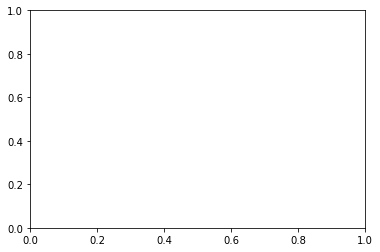

In [36]:
skplt.metrics.plot_confusion_matrix(actual,
                                    predictions,
                                    x_tick_rotation=50,
                                    title=' ',
                                    normalize=True)

In [37]:
confusion_matrix = confusion_matrix(actual, predictions)
confusion_matrix

ValueError: Found input variables with inconsistent numbers of samples: [30, 1835]